In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df.iloc[:,[3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

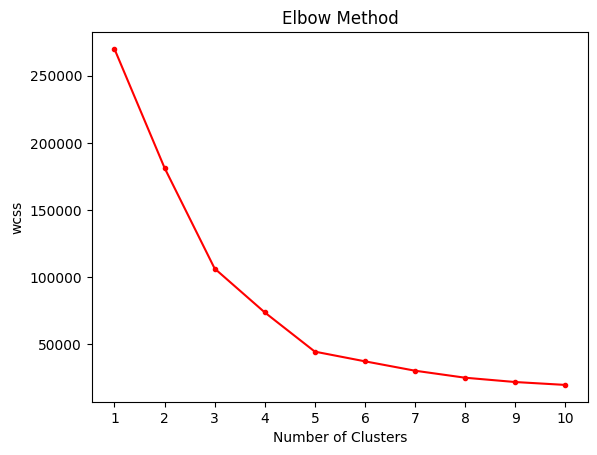

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='.',c='red')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.xticks(np.arange(1,11,1))
#plt.grid()
plt.show()
    

In [67]:
np.random.seed(7)
kmeans = KMeans(n_clusters=5,init='k-means++')
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [69]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

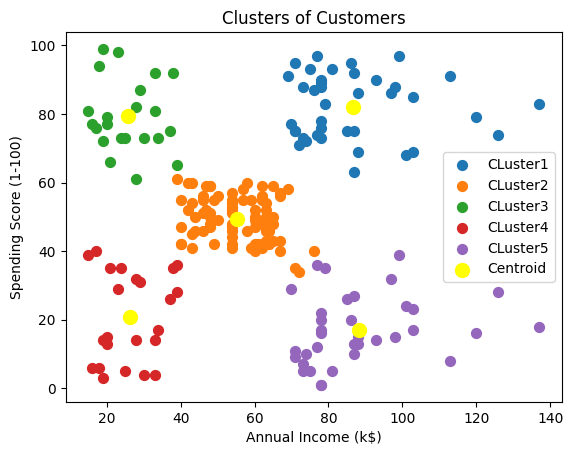

In [82]:
plt.scatter(X[cluster_labels==0,0],X[cluster_labels==0,1],s=50,label='CLuster1')
plt.scatter(X[cluster_labels==1,0],X[cluster_labels==1,1],s=50,label='CLuster2')
plt.scatter(X[cluster_labels==2,0],X[cluster_labels==2,1],s=50,label='CLuster3')
plt.scatter(X[cluster_labels==3,0],X[cluster_labels==3,1],s=50,label='CLuster4')
plt.scatter(X[cluster_labels==4,0],X[cluster_labels==4,1],s=50,label='CLuster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend(loc='right')

In [90]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [92]:
lst_silhouette_avg=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    cluster_labels=kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    lst_silhouette_avg.append(silhouette_avg)
    

In [93]:
lst_silhouette_avg

[0.2918426367691145,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5288104473798049,
 0.4583576977507227,
 0.457462901394195,
 0.45275118302579015]

In [99]:
X = df.iloc[:,[2,4]].values

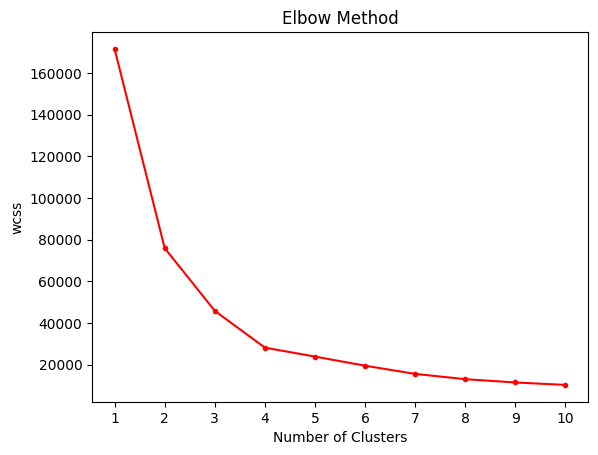

In [100]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='.',c='red')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.xticks(np.arange(1,11,1))
#plt.grid()
plt.show()

In [119]:
#np.random.seed(7)
kmeans = KMeans(n_clusters=4,init='k-means++')
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [120]:
kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

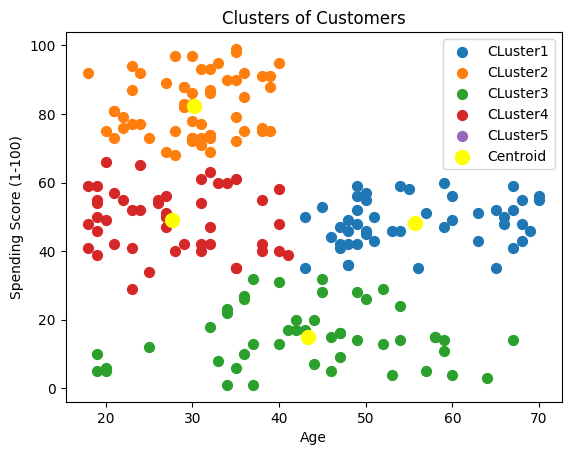

In [126]:
plt.scatter(X[cluster_labels==0,0],X[cluster_labels==0,1],s=50,label='CLuster1')
plt.scatter(X[cluster_labels==1,0],X[cluster_labels==1,1],s=50,label='CLuster2')
plt.scatter(X[cluster_labels==2,0],X[cluster_labels==2,1],s=50,label='CLuster3')
plt.scatter(X[cluster_labels==3,0],X[cluster_labels==3,1],s=50,label='CLuster4')
plt.scatter(X[cluster_labels==4,0],X[cluster_labels==4,1],s=50,label='CLuster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend(loc='upper right')

In [127]:
lst_silhouette_avg=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    cluster_labels=kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X,cluster_labels)
    lst_silhouette_avg.append(silhouette_avg)

In [128]:
lst_silhouette_avg

[0.4692341232501655,
 0.45300127016521263,
 0.49973941540141753,
 0.4343941793109731,
 0.44092943301338033,
 0.42313509747504796,
 0.42996983892561397,
 0.41040555557992137,
 0.4008327307884892]